### Aim:
* To find the relationship between electrical energy output and predictor variables like temperature,humidity,etc,.

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset

#### About the dataset:
* The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
* A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.


In [2]:
df=pd.read_excel('combined power plant.xlsx')

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### To check the no of rows and columns

In [4]:
df.shape

(9568, 5)

#### To check the datatypes of the features

In [5]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

#### To check the column names

In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

#### To check the null values or not

In [7]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

#### Observation:
* There is no null values in this dataset.

#### To check the duplicate values

In [8]:
df.duplicated().sum()

41

#### Observation:
* There are 41 duplicate records in this dataset.

In [9]:
data = df.drop_duplicates()

In [10]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### Statistical Summary

In [11]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### Displaying the feature names and its datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [13]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


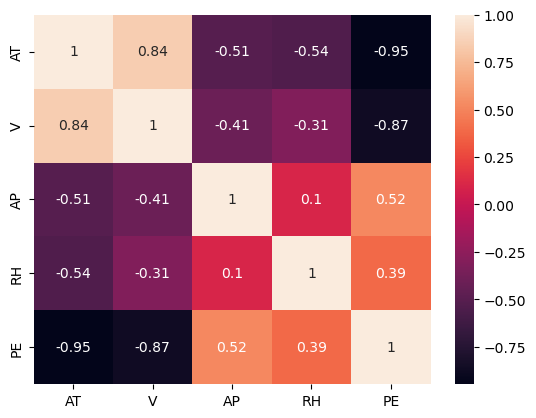

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### To find outliers

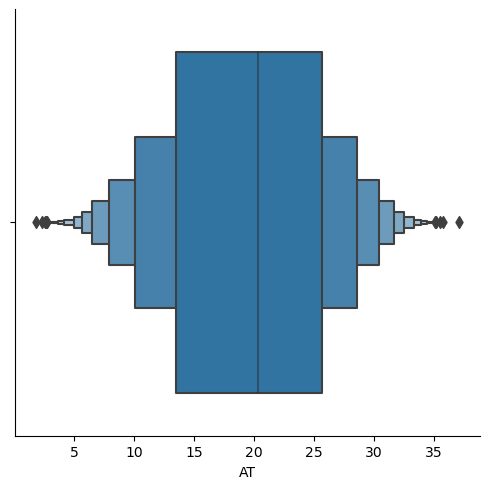

In [15]:
sns.catplot(x='AT',data=df,kind='boxen')
plt.show()

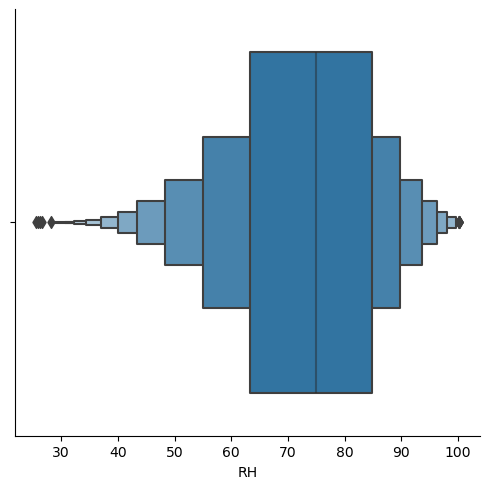

In [16]:
sns.catplot(x='RH',data=df,kind='boxen')
plt.show()

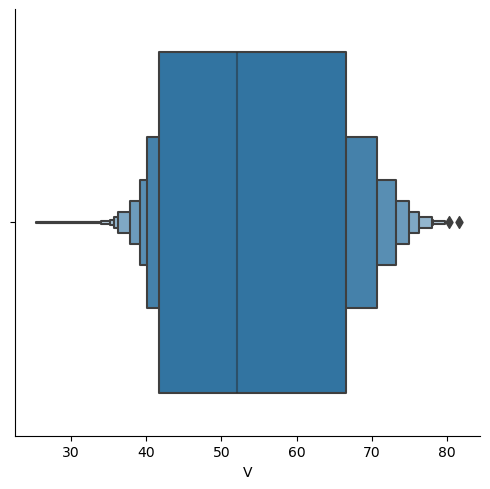

In [17]:
sns.catplot(x='V',data=df,kind='boxen')
plt.show()

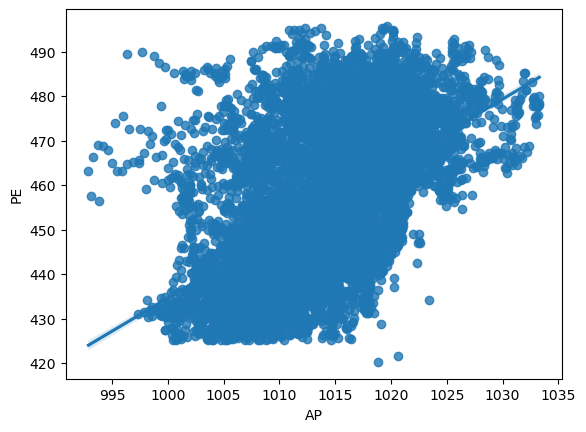

In [27]:
sns.regplot(x="AP",y="PE",data=df)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(df[['AT','V']],df.PE)

LinearRegression()

In [22]:
model.coef_

array([-1.70426591, -0.32448652])

In [23]:
model.intercept_

505.47743381610496

In [24]:
model.predict([[25.18, 62.96]])

array([442.13434721])

In [25]:
pe=505.47743381610496+25.18*-1.70426591+62.96*-0.32448652

In [26]:
pe

442.134346903105

#### Train and Test the model

In [28]:
x=df.drop(df.columns[[2,3,4]], axis=1)
x

,AT,V
0,14.96,41.76
1,25.18,62.96
2,5.11,39.40
3,20.86,57.32
4,10.82,37.50
...,...,...
9563,16.65,49.69
9564,13.19,39.18
9565,31.32,74.33
9566,24.48,69.45


In [29]:
y=df.PE
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 2)
(1914, 2)
(7654,)
(1914,)


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
c = model.intercept_
c

505.4985406504377

In [36]:
m = model.coef_
m

array([-1.70318695, -0.3254719 ])

In [38]:
y_pred = model.predict(x_test)
y_pred

array([441.2305278 , 451.82830309, 478.91702355, ..., 443.76430911,
       445.08238975, 450.9043604 ])

In [39]:
new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [40]:
new_df

,Actual,Predicted
9057,439.14,441.230528
8013,446.51,451.828303
3238,481.89,478.917024
672,476.81,472.603147
863,431.51,433.389045
...,...,...
8555,452.59,448.442939
1602,435.70,439.910907
6270,442.93,443.764309
8178,444.23,445.082390


In [53]:
x_pred = model.predict(x_train)
x_pred

array([470.68708464, 432.90379901, 435.61660275, ..., 448.40793041,
       471.59638754, 422.18012627])

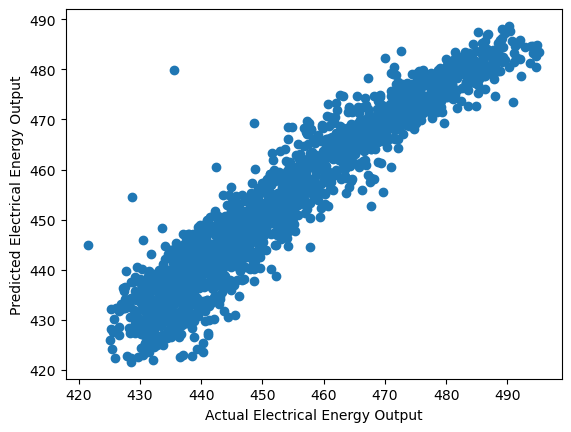

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Electrical Energy Output')
plt.ylabel('Predicted Electrical Energy Output')
plt.show()

#### MSE

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,y_pred)

25.738636670252095

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.073325996843894

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(y_test,y_pred)

3.957667742697708

#### To find how much prediction is good or not good.

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_pred)

0.9136841835042692

#### To  check the accuracy

In [51]:
acc=r2_score(y_test,y_pred)*100

In [52]:
acc

91.36841835042692